# Supervised Machine Learning: Regression

## I. Data Import

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# current working directory
cwd = os.getcwd()

# get the parent directory path
repo_dir = os.path.dirname(cwd)

In [3]:
# read dataset 'salary-explored.pkl'
df = pd.read_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-explored.pkl'))

## II. Data Overview & Data Integrity Checks

### II.1. Data Overview

In [4]:
# make sure pandas display all columns
pd.set_option('display.max_columns', None)

# change the display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# check outputs of df
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category
0,0,2017,2017-01-05 05:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K
1,1,2017,2017-01-05 05:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K
2,2,2017,2017-01-05 05:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K


In [6]:
# check number of rows and columns
df.shape

(6860, 29)

In [7]:
# check columns
df.columns

Index(['id', 'survey_year', 'timestamp', 'salary_in_usd', 'country',
       'primary_db', 'years_of_exp_with_primary_db', 'other_dbs',
       'employment_status', 'job_title', 'manage_staff',
       'years_of_exp_with_data_jobs', 'number_of_companies_worked_for',
       'number_of_team_members', 'number_of_company_employees',
       'number_of_db_servers', 'education', 'education_is_computer_related',
       'certifications', 'hours_worked_per_week', 'wfh_days_per_week',
       'pop_of_largest_city_within_20_miles', 'employment_sector',
       'looking_for_another_job', 'career_plans_this_year', 'other_job_duties',
       'tasks_perfomed', 'month', 'salary_category'],
      dtype='object')

### II.2. Check for missing data

In [8]:
# check for missing values
df.isnull().sum()

id                                     0
survey_year                            0
timestamp                              0
salary_in_usd                          0
country                                0
primary_db                             0
years_of_exp_with_primary_db           0
other_dbs                              0
employment_status                      0
job_title                              0
manage_staff                           0
years_of_exp_with_data_jobs            0
number_of_companies_worked_for         0
number_of_team_members                 0
number_of_company_employees            0
number_of_db_servers                   0
education                              0
education_is_computer_related          0
certifications                         0
hours_worked_per_week                  0
wfh_days_per_week                      0
pop_of_largest_city_within_20_miles    0
employment_sector                      0
looking_for_another_job                0
career_plans_thi

### II.3. Check for duplicate data

In [9]:
# create subset of duplicates
dups = df.duplicated()

In [10]:
# check for duplicates
dups.shape

(6860,)

### II.4. Check for extreme values

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

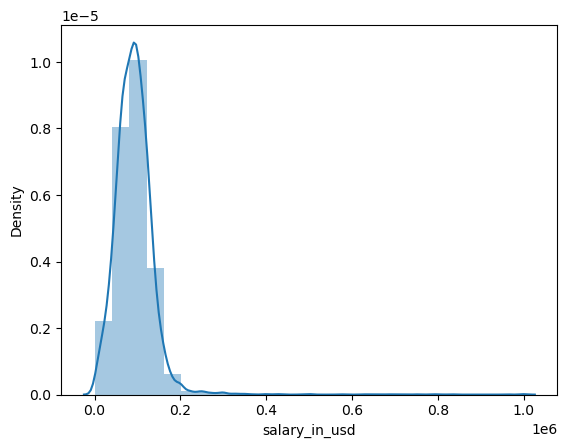

In [33]:
# shows extreme values
sns.distplot(df['salary_in_usd'], bins=25)

Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [13]:
# check the mean
df['salary_in_usd'].mean()

92487.91480612244

In [14]:
# check the median
df['salary_in_usd'].median()

90000.0

In [15]:
# check the max
df['salary_in_usd'].max()

1000000.0

## II. Data Preparation

***Hypothesis 1:** As the years of experience with the primary database increase, so does the salary.*

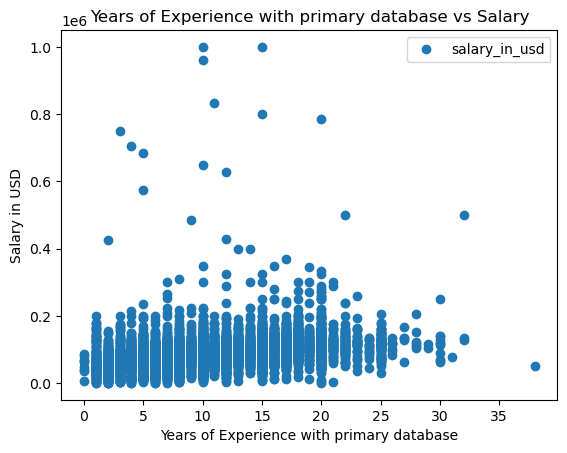

In [34]:
# create a scatterplot
df.plot(x = 'years_of_exp_with_primary_db', y='salary_in_usd',style='o')
plt.title('Years of Experience with primary database vs Salary')  
plt.xlabel('Years of Experience with primary database')  
plt.ylabel('Salary in USD')  
plt.show()

In [35]:
# reshape the variables into NumPy arrays and put them into separate objects
X = df['years_of_exp_with_primary_db'].values.reshape(-1,1)
y = df['salary_in_usd'].values.reshape(-1,1)

In [36]:
X

array([[10],
       [15],
       [ 5],
       ...,
       [10],
       [20],
       [19]], dtype=int64)

In [37]:
y

array([[200000.],
       [ 61515.],
       [ 95000.],
       ...,
       [ 40000.],
       [130000.],
       [ 84500.]])

In [38]:
# split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

***Hypothesis 2:** As the years of experience with data jobs increase, so does the salary.*

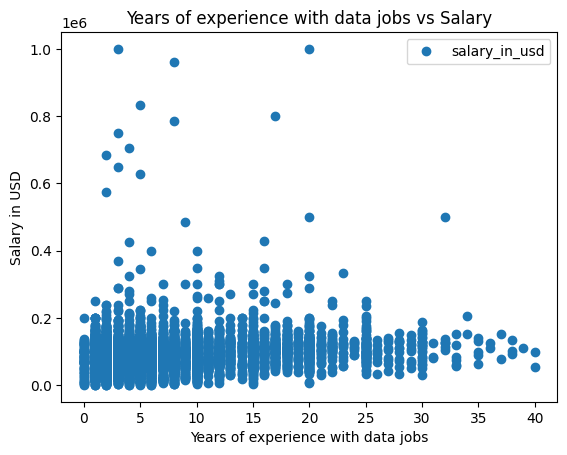

In [4]:
# create a scatterplot
df.plot(x = 'years_of_exp_with_data_jobs', y='salary_in_usd',style='o')
plt.title('Years of experience with data jobs vs Salary')  
plt.xlabel('Years of experience with data jobs')  
plt.ylabel('Salary in USD')  
plt.show()

In [5]:
# reshape the variables into NumPy arrays and put them into separate objects
X_2 = df['years_of_exp_with_data_jobs'].values.reshape(-1,1)
y_2 = df['salary_in_usd'].values.reshape(-1,1)

In [6]:
X_2

array([[ 5],
       [ 3],
       [25],
       ...,
       [19],
       [17],
       [19]], dtype=int64)

In [7]:
y_2

array([[200000.],
       [ 61515.],
       [ 95000.],
       ...,
       [ 40000.],
       [130000.],
       [ 84500.]])

In [8]:
# split data into a training set and a test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

## III. Regression Analysis

### III.1. Hypothesis 1: "As the years of experience with the primary database increase, so does the salary."

#### III.1.1. Test set

In [39]:
# create a regression object
regression = LinearRegression()

In [40]:
# fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

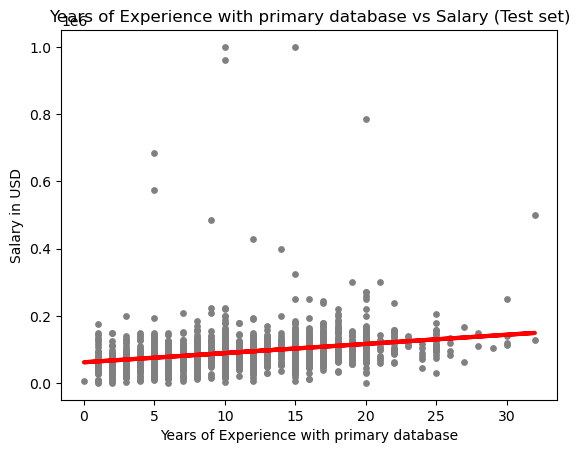

In [45]:
# create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Years of Experience with primary database vs Salary (Test set)')
plot_test.xlabel('Years of Experience with primary database')
plot_test.ylabel('Salary in USD')
plot_test.show()

**Observation:**

The regression line does not cover all of the data points. Some extreme outliers can be seen far away from the line.

In [43]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# print the model summary statistics to evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2728.88060339]]
Mean squared error:  3137314528.6869693
R2 score:  0.08716673251133877


In [46]:
y_predicted

array([[100742.92035715],
       [ 84369.63673681],
       [ 87098.5173402 ],
       ...,
       [ 89827.39794359],
       [ 81640.75613342],
       [ 84369.63673681]])

In [47]:
# create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,90000.00,100742.92
1,73000.00,84369.64
2,53000.00,87098.52
3,150000.00,78911.88
4,44278.00,103471.80
5,105000.00,89827.40
6,170000.00,117116.20
7,85000.00,81640.76
8,71500.00,114387.32
9,126000.00,106200.68


**Observation:**

The model seems to have performed poorly on the test set, as indicated by the high mean squared error of 3137314528.687 and a low R2 score of 0.0872. This means that only about 8.7% of the variation in salary can be explained by the years of experience with the primary database.

Additionally, when looking at the actual and predicted values in the test set, there are significant differences between them, with some predictions being far off from the actual values. Overall, this suggests that the model may not be a good fit for the data and may need to be re-evaluated or refined.

#### III.1.2. Compare how the regression fits the training set

In [48]:
# predict X_train
y_predicted_train = regression.predict(X_train) 

In [49]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2728.88060339]]
Mean squared error:  1895124926.883445
R2 score:  0.12622831005044322


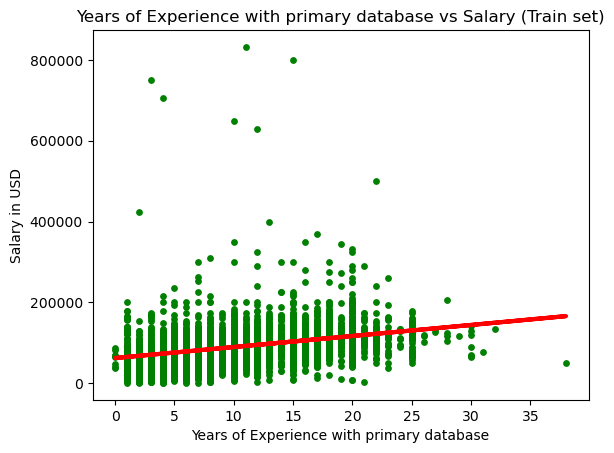

In [51]:
# visualize the training set results
plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_train.title('Years of Experience with primary database vs Salary (Train set)')
plot_train.xlabel('Years of Experience with primary database')
plot_train.ylabel('Salary in USD')
plot_train.show()

**Observation:**

When compared to the test set statistics provided in the previous question, we see that the model performed similarly on the test set. The MSE is even higher for the test set, indicating that the model is not a good fit to the data. The R2 score is also low, which suggests that only a small proportion of the variance in salary can be explained by years of experience with the primary database.

### III.2. Hypothesis 2: "As the years of experience with data jobs increase, so does the salary."

#### III.2.1. Test set

In [9]:
# create a regression object
regression_2 = LinearRegression()

In [10]:
# fit the regression object onto the training set
regression_2.fit(X_train_2, y_train_2)

LinearRegression()

In [11]:
# Predict the values of y using X
y_predicted_2 = regression_2.predict(X_test_2)

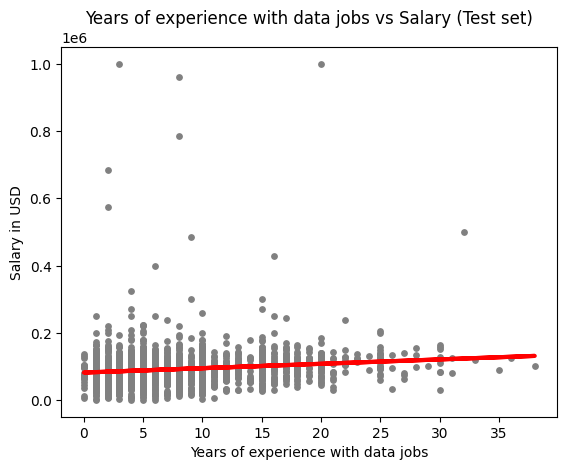

In [12]:
# create a plot that shows the regression line from the model on the test set
plot_test_2 = plt
plot_test_2.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test_2.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test_2.title('Years of experience with data jobs vs Salary (Test set)')
plot_test_2.xlabel('Years of experience with data jobs')
plot_test_2.ylabel('Salary in USD')
plot_test_2.show()

In [13]:
# create objects that contain the model summary statistics
rmse_2 = mean_squared_error(y_test_2, y_predicted_2) # This is the mean squared error
r2_2 = r2_score(y_test_2, y_predicted_2) # This is the R2 score. 

In [14]:
# print the model summary statistics to evaluate the performance of the model
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[1303.62953917]]
Mean squared error:  3365450106.657759
R2 score:  0.020788387858516666


In [15]:
y_predicted_2

array([[103363.75210184],
       [ 95541.97486684],
       [ 86416.56809268],
       ...,
       [ 95541.97486684],
       [ 91631.08624935],
       [ 85112.93855351]])

In [16]:
# create a dataframe comparing the actual and predicted values of y
data_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_2.head(30)

,Actual,Predicted
0,90000.0,103363.752102
1,73000.0,95541.974867
2,53000.0,86416.568093
3,150000.0,90327.456710
4,44278.0,90327.456710
5,105000.0,95541.974867
6,170000.0,108578.270259
7,85000.0,86416.568093
8,71500.0,107274.640719
9,126000.0,89023.827171


**Observation:**

According to the regression model, there is a positive relationship between the independent and dependent variables with a slope of 1303.62954. However, the high mean squared error of 3365450106.6578 suggests that the model's predictions may be significantly different from the actual values. Furthermore, the R2 score of 0.0208 indicates that only a small percentage of the variance in the dependent variable can be explained by the independent variable.

By examining the actual versus predicted values, we can see that the model tends to overestimate the dependent variable, and some predictions are considerably different from the actual values. Consequently, this model may not be suitable for this dataset, and further adjustments or improvements may be necessary.

#### III.2.2. Compare how the regression fits the training set

In [17]:
# predict X_train
y_predicted_train_2 = regression_2.predict(X_train_2) 

In [18]:
rmse_2 = mean_squared_error(y_train_2, y_predicted_train_2)
r2_2 = r2_score(y_train_2, y_predicted_train_2)

In [19]:
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[1303.62953917]]
Mean squared error:  2099435562.1601717
R2 score:  0.032028267336640326


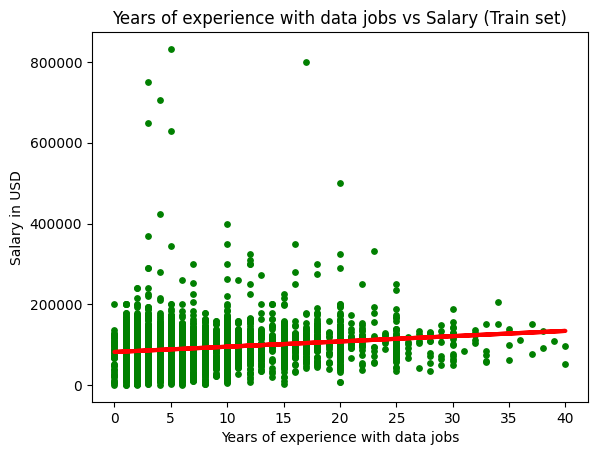

In [21]:
# visualize the training set results
plot_train_2 = plt
plot_train_2.scatter(X_train_2, y_train_2, color='green', s = 15)
plot_train_2.plot(X_train_2, y_predicted_train_2, color='red', linewidth =3)
plot_train_2.title('Years of experience with data jobs vs Salary (Train set)')
plot_train_2.xlabel('Years of experience with data jobs')
plot_train_2.ylabel('Salary in USD')
plot_train_2.show()

### III.3. Performance improvement after removing outliers

#### III.3.1. Hypothesis 1

In [22]:
# clean the extreme values from variable 'salary_in_usd' observed during the consistency checks
# according to 03. Geographical Visualizations, extreme values in column 'salary_in_usd' are above 250000
df_test = df[df['salary_in_usd'] <= 250000]

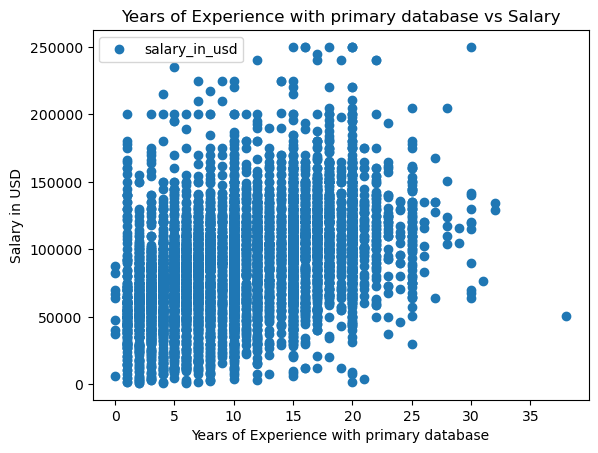

In [25]:
# check scatterplot wihtout outliers
df_test.plot(x = 'years_of_exp_with_primary_db', y='salary_in_usd',style='o')
plt.title('Years of Experience with primary database vs Salary')  
plt.xlabel('Years of Experience with primary database')  
plt.ylabel('Salary in USD')  
plt.show()

In [23]:
# reshape again
X_3 = df_test['years_of_exp_with_primary_db'].values.reshape(-1,1)
y_3 = df_test['salary_in_usd'].values.reshape(-1,1)

In [24]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [26]:
# run and fit the regression
regression_3 = LinearRegression()  
regression_3.fit(X_train_3, y_train_3)

LinearRegression()

In [27]:
# predict
y_predicted_3 = regression_3.predict(X_test_3)

In [28]:
rmse_3 = mean_squared_error(y_test_3, y_predicted_3)
r2_3 = r2_score(y_test_3, y_predicted_3)

In [29]:
print('Slope:' ,regression_3.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope: [[2654.09621334]]
Mean squared error:  1086402358.876127
R2 score:  0.1797264211703089


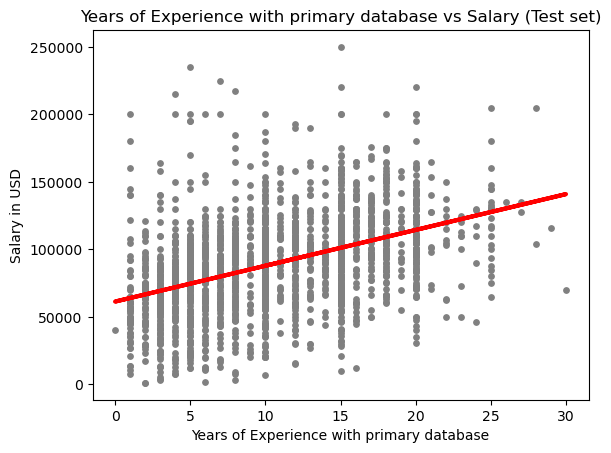

In [30]:
# visualize the test set results
plot_test_3 = plt
plot_test_3.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test_3.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test_3.title('Years of Experience with primary database vs Salary (Test set)')
plot_test_3.xlabel('Years of Experience with primary database')
plot_test_3.ylabel('Salary in USD')
plot_test_3.show()

**Observation:**
    
The regression line works better than in the Test set including outliers; however, many data points are still not covered.

In [31]:
data_3 = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data_3.head(30)

,Actual,Predicted
0,62100.0,87885.768079
1,57000.0,93193.960506
2,170000.0,101156.249146
3,101000.0,82577.575653
4,160000.0,98502.152933
5,153000.0,101156.249146
6,125000.0,93193.960506
7,84000.0,101156.249146
8,165000.0,103810.345359
9,12000.0,103810.345359


**Observation:**

The updated model appears to have performed slightly better than the previous one, as indicated by a higher R2 score (0.1797 versus 0.0872) and a lower mean squared error (1086402358.876127 versus 3137314528.6869693).

However, the R2 score is still relatively low, indicating that the model may not be capturing all of the variation in the data. The predicted values are generally within a reasonable range of the actual values, although there are some instances where the model appears to be under- or over-predicting the salaries. Overall, while the updated model may be an improvement over the previous one, there may still be room for further refinement.

#### III.3.2. Hypothesis 2

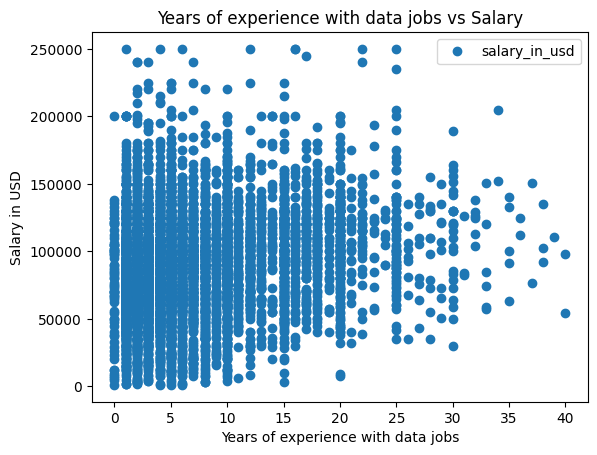

In [23]:
# check scatterplot wihtout outliers
df_test.plot(x = 'years_of_exp_with_data_jobs', y='salary_in_usd',style='o')
plt.title('Years of experience with data jobs vs Salary')  
plt.xlabel('Years of experience with data jobs')  
plt.ylabel('Salary in USD')  
plt.show()

In [24]:
# reshape again
X_4 = df_test['years_of_exp_with_data_jobs'].values.reshape(-1,1)
y_4 = df_test['salary_in_usd'].values.reshape(-1,1)

In [25]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [26]:
# run and fit the regression
regression_4 = LinearRegression()  
regression_4.fit(X_train_4, y_train_4)

LinearRegression()

In [27]:
# predict
y_predicted_4 = regression_4.predict(X_test_4)

In [28]:
rmse_4 = mean_squared_error(y_test_4, y_predicted_4)
r2_4 = r2_score(y_test_4, y_predicted_4)

In [29]:
print('Slope:' ,regression_4.coef_)
print('Mean squared error: ', rmse_4)
print('R2 score: ', r2_4)

Slope: [[1233.17615048]]
Mean squared error:  1277970165.8107767
R2 score:  0.03508570928397048


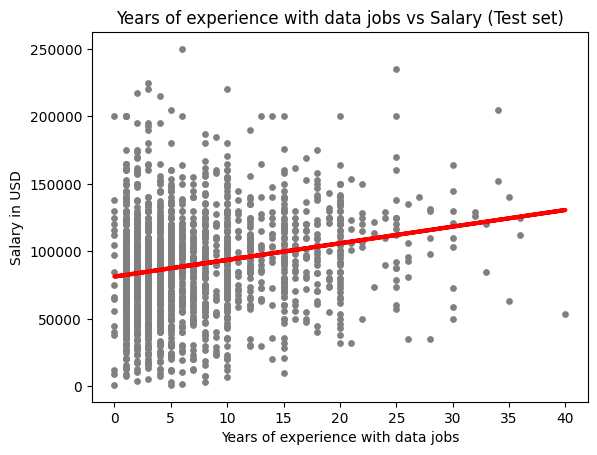

In [30]:
# visualize the test set results
plot_test_4 = plt
plot_test_4.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test_4.plot(X_test_4, y_predicted_4, color='red', linewidth =3)
plot_test_4.title('Years of experience with data jobs vs Salary (Test set)')
plot_test_4.xlabel('Years of experience with data jobs')
plot_test_4.ylabel('Salary in USD')
plot_test_4.show()

In [31]:
data_4 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_predicted_4.flatten()})
data_4.head(30)

,Actual,Predicted
0,62100.0,88756.263307
1,57000.0,96155.320210
2,170000.0,112186.610166
3,101000.0,91222.615608
4,160000.0,112186.610166
5,153000.0,82590.382554
6,125000.0,89989.439457
7,84000.0,85056.734855
8,165000.0,85056.734855
9,12000.0,81357.206404


**Observation:**

After removing extreme values from the data, the performance of the regression model improved. The slope of the model is now 1233.17615048, which indicates that there is still a positive relationship between the independent and dependent variables, albeit weaker than before. The mean squared error is much lower than before, which suggests that the model's predictions are much closer to the actual values. The R2 score is also higher than before, indicating that a slightly higher percentage of the variance in the dependent variable can be explained by the independent variable.

Looking at the actual vs. predicted values, we can see that the model's predictions are generally closer to the actual values, with fewer extreme values. However, there are still some instances where the model's predictions are far off from the actual values. Therefore, the model may still need further adjustments or improvements, but overall it is performing better after removing extreme values from the data.

#### III.3.3. Data bias reflection

As in the case of the regression models where salaries higher than 250,000 were excluded from the dataset, it might be that the model was trained and evaluated on a biased dataset. This is because the excluded values may have represented a particular subgroup of the population with unique characteristics that are not captured in the remaining data. As a result, the model may not generalize well to new data, and its performance may be limited to the data it was trained on.